# Run the whole deltas algorithm

In [94]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [95]:
N1 = 1000
N2 = 10
m = 2
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-m, -m],
    m2=[m, m],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )

## Get Classifier

Original


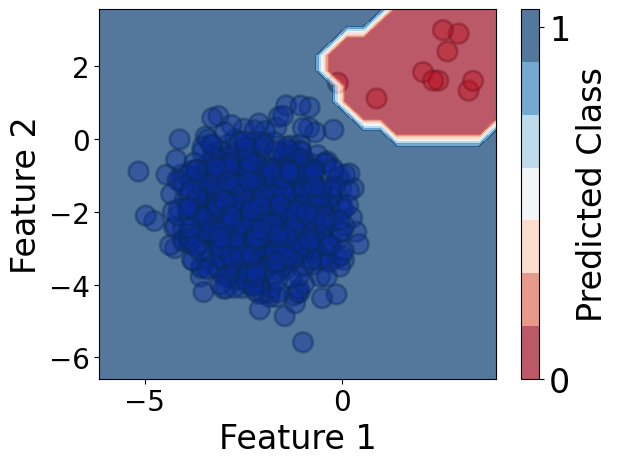

SMOTE


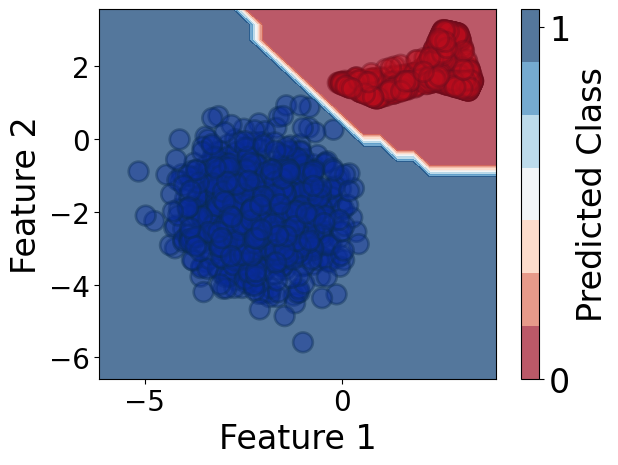

Balanced Weights


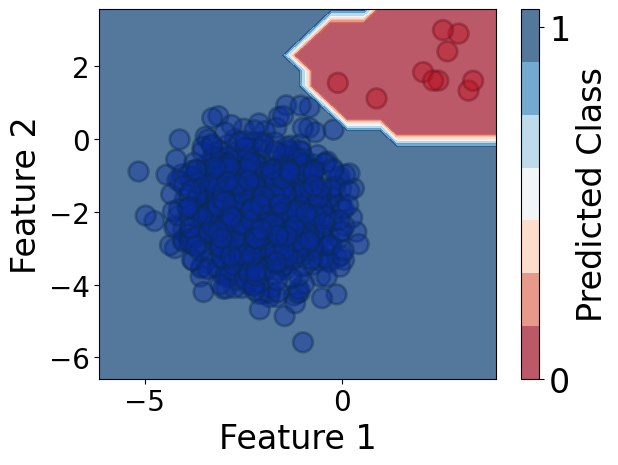

Bayes Minimum Risk (calibrated)


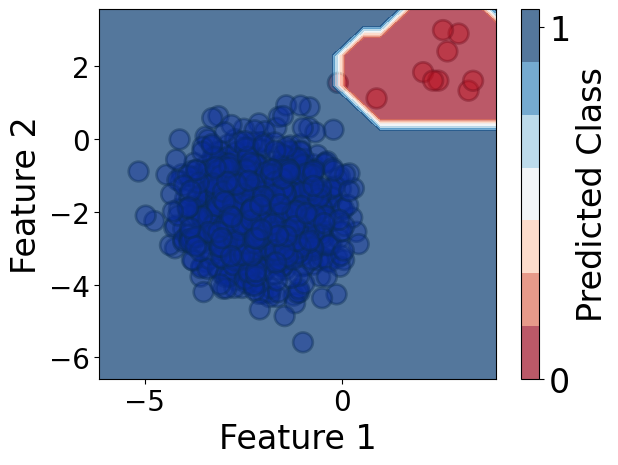

Bayes Minimum Risk


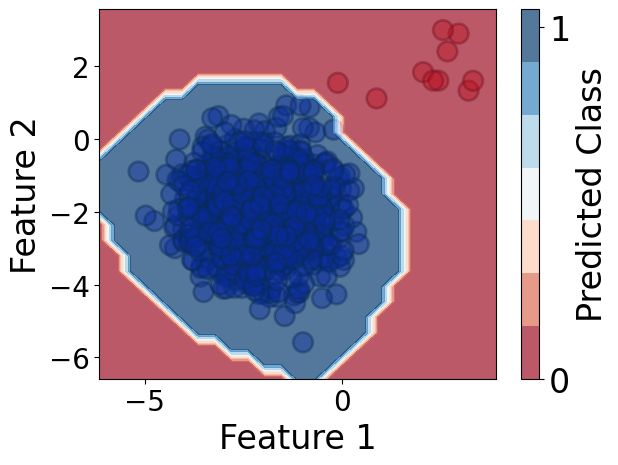

Thresholding


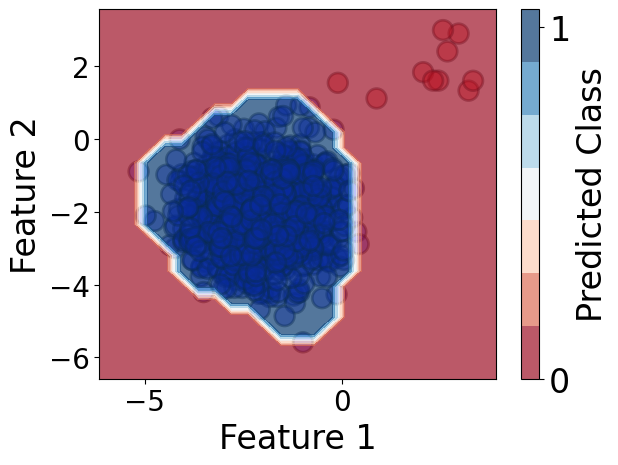

In [96]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)
data_clf['clf'] = classifiers_dict['Original']                    

## Fit deltas

Original Data


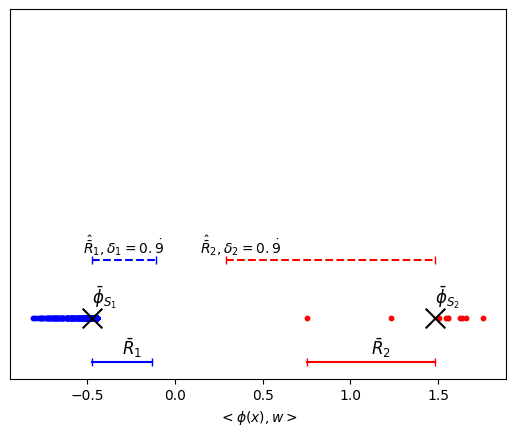

Original dataset is solvable so not downsampling, set 'force_downsample' to 'True' to try and find a lower loss via downsampling anyway
Original Data:


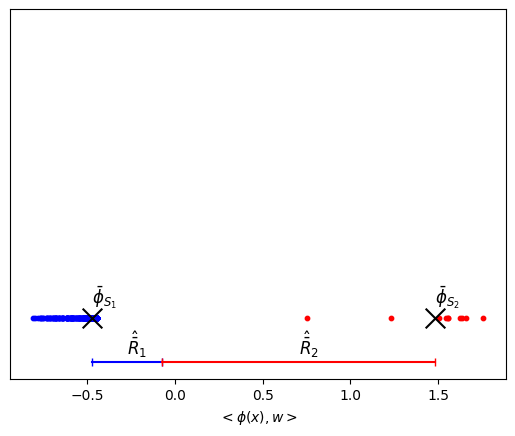

In [97]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = downsample.downsample_deltas(
#     clf).fit(X, y, _print=True, _plot=True, max_trials=10000)
# deltas_model = base.base_deltas(
#     clf).fit(X, y, grid_search=True, _print=True, _plot=True)
deltas_model = downsample.downsample_deltas(
    clf).fit(X, y, _print=True, _plot=True, grid_search=True)

## Plot training data information

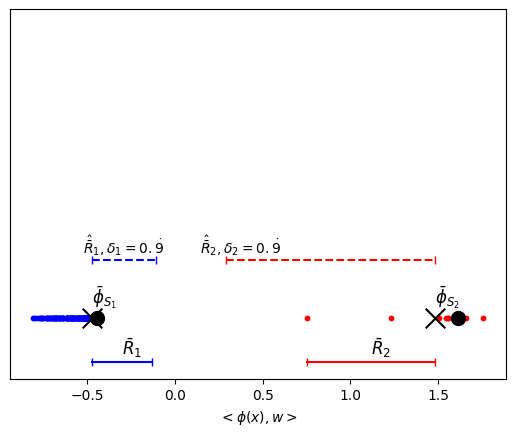

In [98]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [99]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [100]:
deltas_model.print_params()

Parameters
                R:  1.7584414260007635
                N1: 1000
                N2: 10
                R1: 0.3417183932301497
                R2: 0.7318054934312627
                M:  1.1955979167587776
                D:  1.9536592578882488
                C1: 1
                C2: 1


# Evaluation on test data

                                 Accuracy    G-Mean  ROC-AUC        F1
Method                                                                
Original                          0.95475  0.953682  0.95475  0.952610
SMOTE                             0.99355  0.993532  0.99355  0.993511
Balanced Weights                  0.96905  0.968562  0.96905  0.968068
Bayes Minimum Risk (calibrated)   0.92520  0.922171  0.92520  0.919153
Bayes Minimum Risk                0.99700  0.996999  0.99700  0.996995
Thresholding                      0.98935  0.989314  0.98935  0.989439
Our Method                        0.99625  0.996245  0.99625  0.996239 


Original


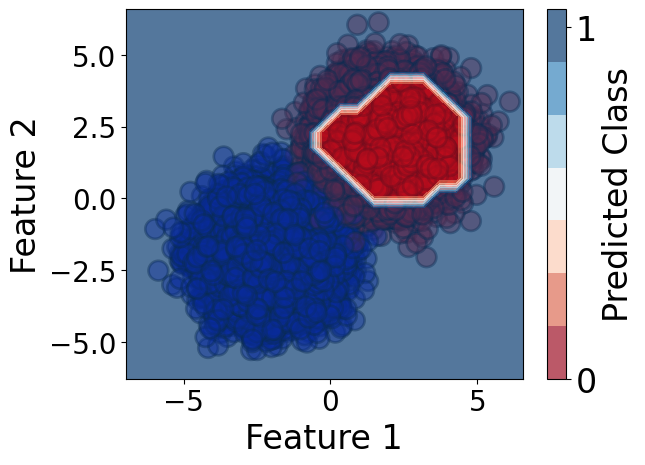

SMOTE


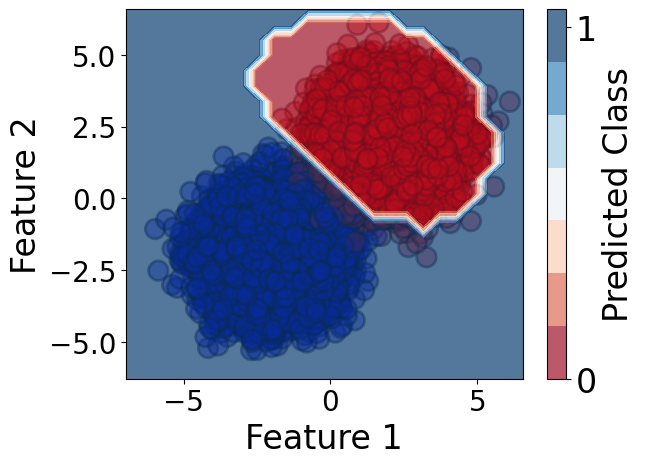

Balanced Weights


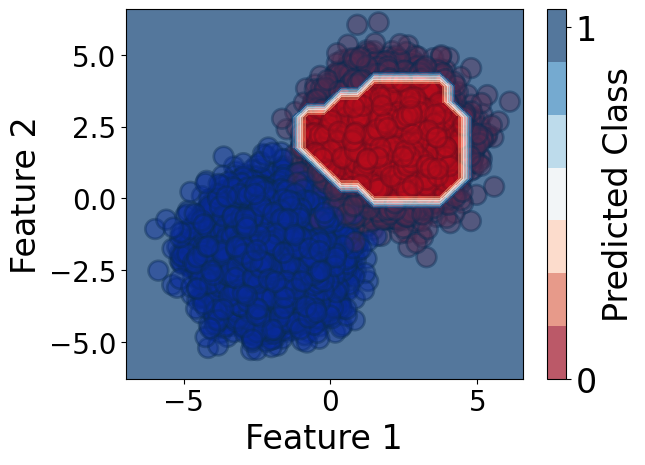

Bayes Minimum Risk (calibrated)


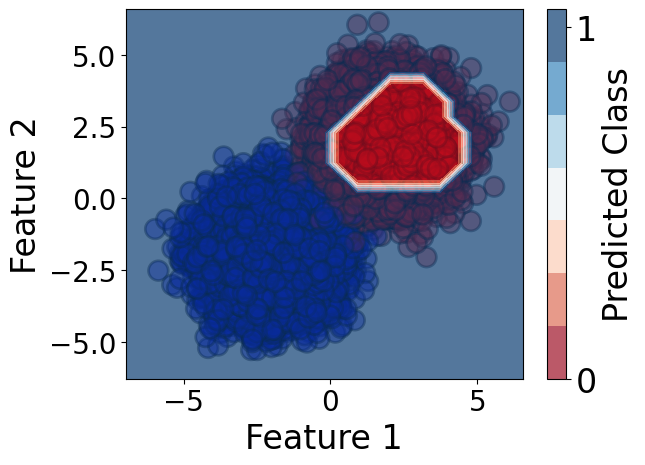

Bayes Minimum Risk


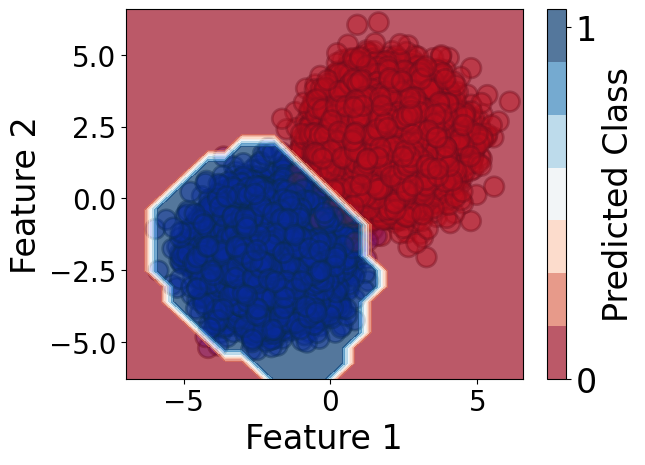

Thresholding


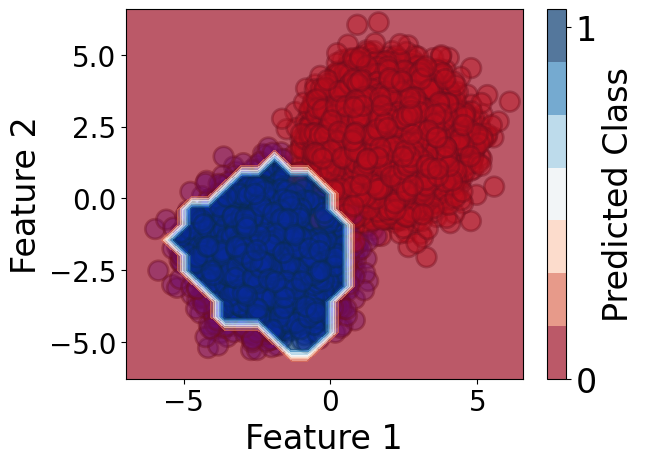

Our Method


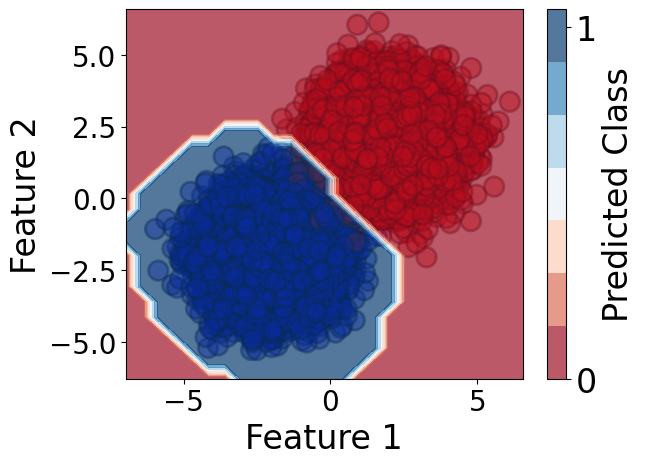

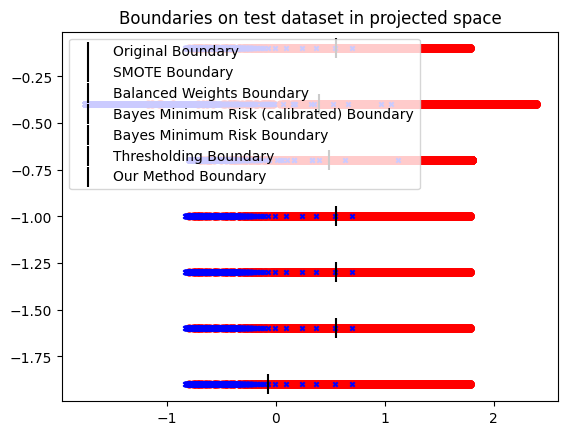

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.9547 & 0.9537 & 0.9547 & 0.9526 \\
SMOTE & 0.9936 & 0.9935 & 0.9936 & 0.9935 \\
Balanced Weights & 0.9690 & 0.9686 & 0.9690 & 0.9681 \\
Bayes Minimum Risk (calibrated) & 0.9252 & 0.9222 & 0.9252 & 0.9192 \\
Bayes Minimum Risk & 0.9970 & 0.9970 & 0.9970 & 0.9970 \\
Thresholding & 0.9893 & 0.9893 & 0.9893 & 0.9894 \\
Our Method & 0.9962 & 0.9962 & 0.9962 & 0.9962 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.95475,0.953682,0.95475,0.952610
SMOTE,0.99355,0.993532,0.99355,0.993511
Balanced Weights,0.96905,0.968562,0.96905,0.968068
Bayes Minimum Risk (calibrated),0.92520,0.922171,0.92520,0.919153
Bayes Minimum Risk,0.99700,0.996999,0.99700,0.996995
Thresholding,0.98935,0.989314,0.98935,0.989439
Our Method,0.99625,0.996245,0.99625,0.996239


In [101]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)